In [18]:
import numpy as np
import matplotlib.pyplot as plt

# implementing the backward Euler method using the Newton-Raphson method to solve the nonlinear system of equations
def backward_euler_newton_raphson(u0, t0, tf, h, f, jacobian_g, k_values, max_iter=100, tol=1e-6):
    t = t0
    u = np.array(u0)
    results = [(t, u.copy())]
    
    while t + h <= tf:
        u_prev = u.copy()
        for _ in range(max_iter):
            g = u - u_prev - h * f(t + h, u, k_values)
            Jg = jacobian_g(t + h, u, k_values, h)
            delta_u = np.linalg.solve(Jg, g)
            u -= delta_u
            if np.linalg.norm(delta_u) < tol:
                break
        t += h
        results.append((t, u.copy()))
    
    return results

def f(t, u, k):
    k1, k2, k3 = k
    u1, u2, u3 = u
    return np.array([-k1 * u1 + k2 * u2 * u3, 
                     k1 * u1 - k2 * u2 * u3 - k3 * u2**2, 
                     k3 * u2**2])

def jacobian_f(t, u, k):
    k1, k2, k3 = k
    u1, u2, u3 = u
    return np.array([[-k1, k2*u3, k2*u2],
                     [k1, -k2*u3 - 2*k3*u2, -k2*u2],
                     [0, 2*k3*u2, 0]])

def jacobian_g(t, u, k, h):
    Jf = jacobian_f(t, u, k)
    I = np.eye(len(u))
    return I - h * Jf

# Initial conditions and parameters
u0 = [1.0, 0, 0]
t0 = 0
tf = 5
h = 0.0001
k_values = [0.04, 1e4, 3e7]

results_nr = backward_euler_newton_raphson(u0, t0, tf, h, f, jacobian_g, k_values)


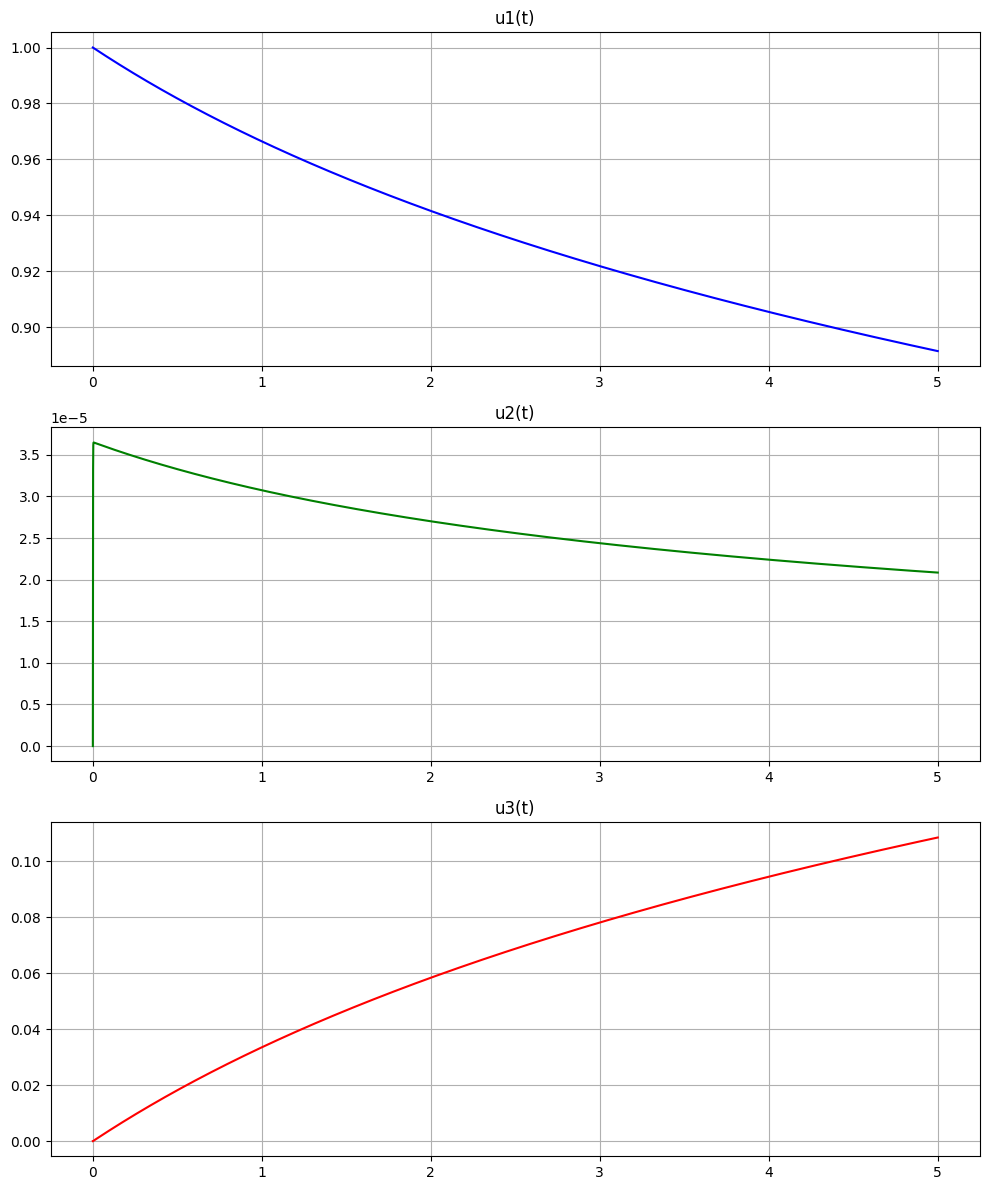

In [39]:
# individual plot of solutions
times = [t for t, _ in results_nr]
u1_values_nr = [u[0] for _, u in results_nr]
u2_values_nr = [u[1] for _, u in results_nr]
u3_values_nr = [u[2] for _, u in results_nr]


fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(times, u1_values_nr, label='u1(t)', color='blue')
axs[0].set_title('u1(t)')
axs[0].grid(True)

axs[1].plot(times, u2_values_nr, label='u2(t)', color='green')
axs[1].set_title('u2(t)')
axs[1].grid(True)

axs[2].plot(times, u3_values_nr, label='u3(t)', color='red')
axs[2].set_title('u3(t)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

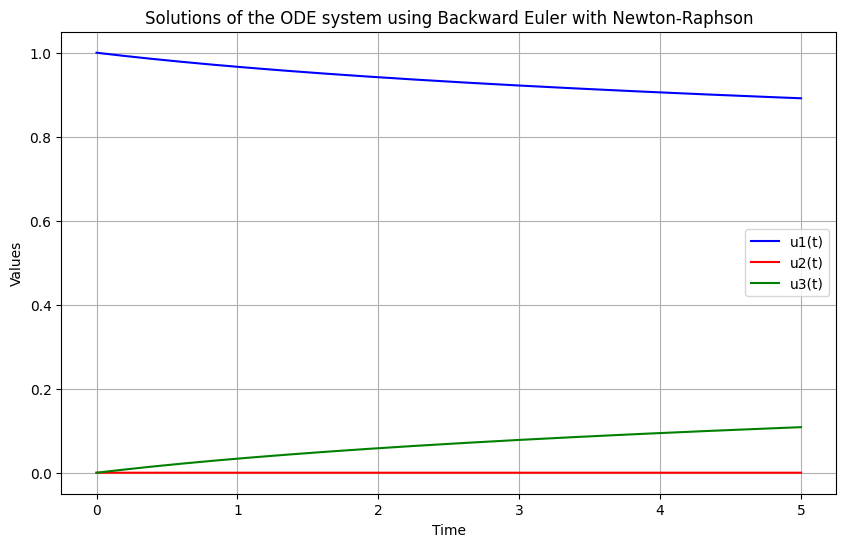

In [43]:
# all solutions in one plot
plt.figure(figsize=(10, 6))
plt.plot(times, u1_values_nr, label='u1(t)', color='blue')
plt.plot(times, u2_values_nr, label='u2(t)', color='red')
plt.plot(times, u3_values_nr, label='u3(t)', color='green')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Solutions of the ODE system using Backward Euler with Newton-Raphson')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# implementing the backward Euler method using the fixed-point iteration method to solve the nonlinear system of equations
tf = 5
h = 0.0001 # the method won't converge for h >= 0.001
def backward_euler_fixed_point(u0, t0, tf, h, f, k_values, max_iter=100, tol=1e-6):
    t = t0
    u = np.array(u0)
    results = [(t, u.copy())]
    
    while t + h <= tf:
        u_prev_iter = u.copy()
        for i in range(max_iter):
            u_new = u + h * f(t + h, u_prev_iter, k_values)
            if np.linalg.norm(u_new - u_prev_iter) < tol:
                break
            # Check for divergence
            if i > 1 and np.linalg.norm(u_new - u_prev_iter) > np.linalg.norm(u - u_prev_iter):
                print("Warning: Fixed-point iteration is diverging. Breaking out.")
                return results
            u_prev_iter = u_new
        u = u_new
        t += h
        results.append((t, u.copy()))
    
    return results

results_fp = backward_euler_fixed_point(u0, t0, tf, h, f, k_values)

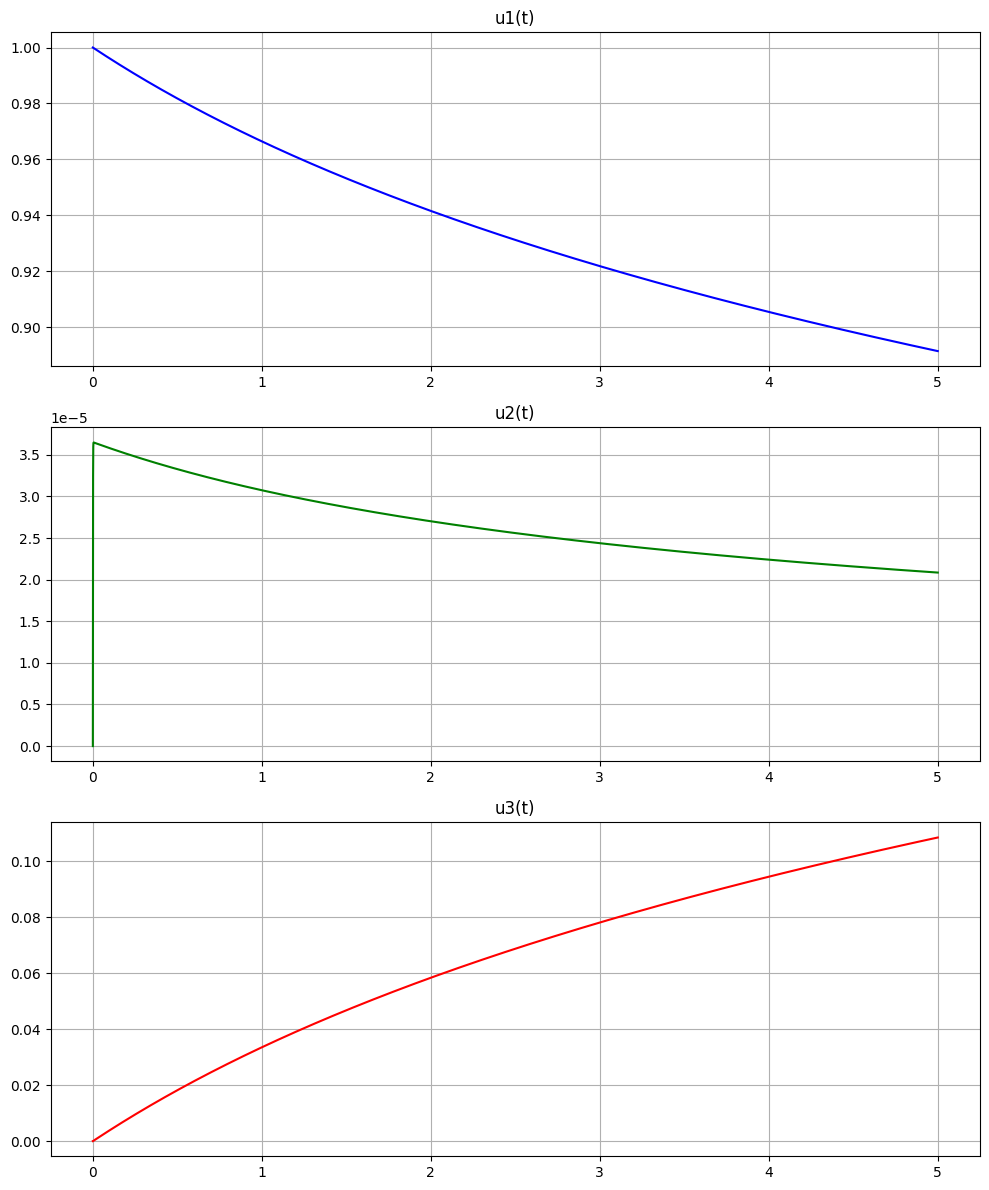

In [22]:
times = [t for t, _ in results_fp]
u1_values_fp = [u[0] for _, u in results_fp]
u2_values_fp = [u[1] for _, u in results_fp]
u3_values_fp = [u[2] for _, u in results_fp]

# Plotting the solutions in separate subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(times, u1_values_fp, label='u1(t)', color='blue')
axs[0].set_title('u1(t)')
axs[0].grid(True)

axs[1].plot(times, u2_values_fp, label='u2(t)', color='green')
axs[1].set_title('u2(t)')
axs[1].grid(True)

axs[2].plot(times, u3_values_fp, label='u3(t)', color='red')
axs[2].set_title('u3(t)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

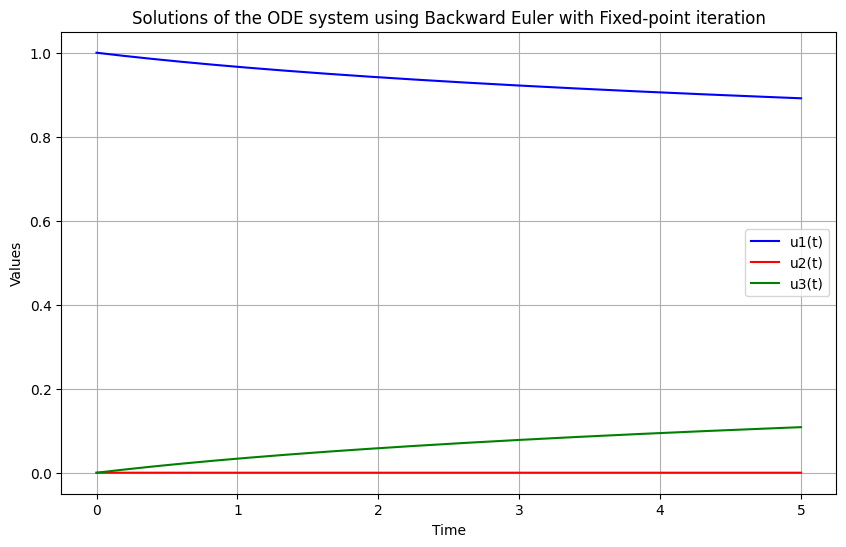

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(times, u1_values_fp, label='u1(t)', color='blue')
plt.plot(times, u2_values_fp, label='u2(t)', color='red')
plt.plot(times, u3_values_fp, label='u3(t)', color='green')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Solutions of the ODE system using Backward Euler with Fixed-point iteration')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# comparing the solutions obtained with the two methods
np.allclose(u1_values_fp, u1_values_nr, atol=1e-3)

True

In [49]:
np.allclose(u2_values_fp, u2_values_nr, atol=1e-3)

True

In [50]:
np.allclose(u3_values_fp, u3_values_nr, atol=1e-3)

True

In [61]:
# checking if the solutions are non-negative
np.all(np.array(u1_values_fp) >=0), np.all(np.array(u1_values_nr) >=0)

(True, True)

In [62]:
np.all(np.array(u2_values_fp) >=0), np.all(np.array(u2_values_nr) >=0)

(True, True)

In [63]:
np.all(np.array(u3_values_fp) >=0), np.all(np.array(u3_values_nr) >=0)

(True, True)